In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

df = pd.read_csv('/ROCK_OR_MINE.csv', header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
#Here we use this function to check if there are any missing or null values in the data set. It is given to us by column and we see that none are null.
df.isna().any()

0     False
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Length: 61, dtype: bool

In [7]:
#a quick showing of statistic meassurements of the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
#Here we single out a column (in this case Mine or Rock) and we are given the number for each result where M is a Mine and R is for Rock.
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
#Here we are spliting into features X and target Y
X = df.drop(60, axis=1)

y = df[60]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#This print statement visually compares each X and show that the spliting was successful
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [12]:
#Creating a KNN model that will give the best fit k-value
def knn_example(k_value):
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    return accuracy

In [17]:
k_values = range(1,6)
accuracies_elbow = []

for k in k_values:
    accuracy = knn_example(k)
    accuracies_elbow.append(accuracy)

best_k_elbow = k_values[np.argmax(accuracies_elbow)]

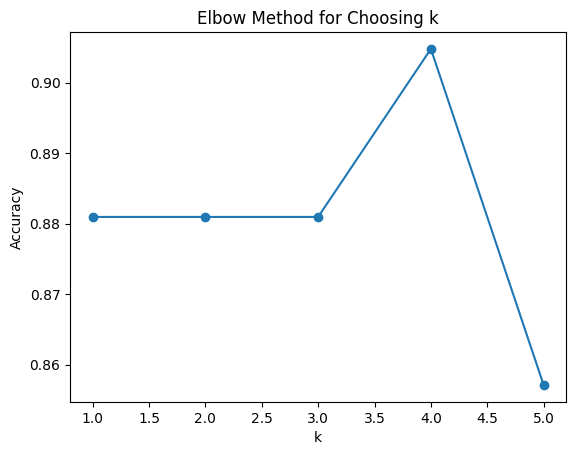

In [18]:
# Plotting the Elbow Method results
plt.plot(k_values, accuracies_elbow, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Choosing k')
plt.show()

In [20]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 5)}

# Create the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV for cross-validated grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best value of k
best_k_grid  = grid_search.best_params_['n_neighbors']

In [21]:
#Get the accuracy with the best value for k
accuracy_grid = knn_example(best_k_grid)

In [22]:
#Accuracy from KNN model
print(accuracy_grid)

0.8809523809523809
